In [1]:
output_dir = "output/"
# run.py
from mesa.batchrunner import BatchRunner

from ecosystem.model import EcoModel

# fixed_params = {"width": 50,
#                 "height": 50,
#                 "b": 0.5,
#                 "m": 0.1}

# variable_params = {"b": range(0, 1, 2)}

# batch_run = BatchRunner(EcoModel,
#                         fixed_parameters=fixed_params,
#                         variable_parameters=None,  
#                         iterations=5,
#                         max_steps=100)
# batch_run.run_model()


In [2]:
from ecosystem.model import EcoModel
from mesa.datacollection import DataCollector
import time
import json
start_time = time.time()

# fixed_params = {"width": 50,
#                 "height": 50,
#                 "b": 0.5,
#                 "m": 0.1}

m=0.3
b=0.55
# Switch to use model with flowlength extension
with_FL = True

if with_FL:
    config_file = "ecosystem/config_file.json"
else:
    config_file = "ecosystem/config_file_figure_3.json"

params = json.load(open(config_file))
m=0.2
b=0.55
f =  params["f"]
d = params["d"]
c = params["c"]
r = params["r"]
delta = params["delta"]
alpha_f = params["alpha_feedback"]
alpha_b = params["alpha_bare"]

alpha_f=1.75

model = EcoModel(b, m, d,f,c,r,delta, alpha_f, alpha_b, config_file)

for i in range(400):
    model.step()
    
print(time.time()-start_time)

/Users/efiathieniti/miniconda3/envs/py35/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/efiathieniti/miniconda3/envs/py35/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/efiathieniti/Dropbox/UVA/ABM/abm/ecosystem/model.py:112: RuntimeWarning: invalid value encountered in double_scalars
  * self.d_s / ((1 - q_flowlength) ** 2 * self.L)


233.18193197250366


In [3]:
stats = model.datacollector.get_model_vars_dataframe()
stats['total'] = (stats.Degraded+stats.Vegetated+stats.Empty)
stats.head(10)


,Degraded,Empty,Vegetated,b,flowlength,qminusminus,qminusplus,qplusplus,total
0,512,454,9034,0.547847,0.059711,0.086957,0.052136,0.902369,10000
1,184,2397,7419,0.547973,0.056241,0.258427,0.016815,0.742014,10000
2,295,3083,6622,0.543347,0.184545,0.368117,0.027899,0.677665,10000
3,428,3501,6071,0.539806,0.282794,0.437389,0.038297,0.635892,10000
4,593,3772,5635,0.536709,0.368696,0.483162,0.050799,0.599645,10000
5,693,4009,5298,0.550000,0.445179,0.526584,0.055917,0.579841,10000
6,781,4181,5038,0.550000,0.522597,0.548065,0.063220,0.554883,10000
7,918,4222,4860,0.550000,0.577120,0.572665,0.070679,0.548045,10000
8,1013,4342,4645,0.550000,0.631422,0.598693,0.075081,0.537352,10000
9,1116,4323,4561,0.550000,0.699421,0.615187,0.077834,0.541109,10000


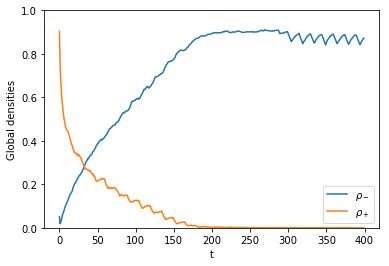

In [4]:
# Figure 3a 
# Plot the global densities at each time step

from matplotlib import pyplot as plt
total = (stats.Degraded+stats.Vegetated+stats.Empty)
plt.plot(stats.Degraded/(total), label = r'$\rho_-$')
plt.plot(stats.Vegetated/(total), label = r'$\rho_+$')
plt.legend()
plt.xlabel('t')
plt.ylim([0,1])
plt.ylabel('Global densities')
plt.savefig(output_dir+"Global_densities_delta_%s_c_%s_r_%s_d_%s_f%s_m_%s_b_%s_FL_%s.png"%(delta,c,r,d,f,m,b, with_FL), format = 'png' )
plt.show()

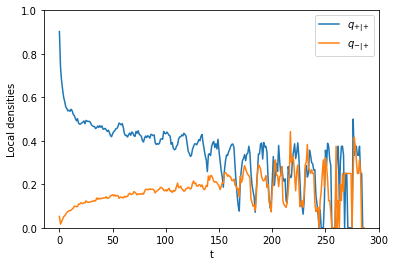

In [5]:
# Plot local densities
# q+|+ number of vegetated neighbours of vegetates sites
# q-|+ number of vegetated neighbours of degraded sites

from matplotlib import pyplot as plt

plt.plot(stats.qplusplus, label = r'$q_{+|+}$')
plt.plot(stats.qminusplus, label = r'$q_{-|+}$')
plt.legend()
plt.xlabel('t')
plt.ylim([0,1])
plt.ylabel('Local densities')
plt.savefig(output_dir + "Local_densities_delta_%s_c_%s_r_%s_d_%s_f%s_m_%s_b_%s_FL_%s.png"%(delta,c,r,d,f,m,b, with_FL), format = 'png' )
plt.show()



/Users/efiathieniti/miniconda3/envs/py35/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


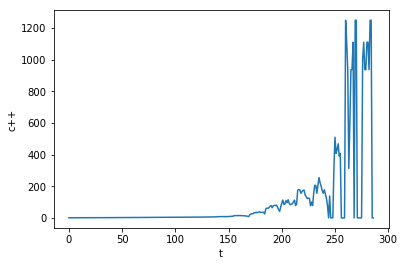

In [6]:
from matplotlib import pyplot as plt
plt.plot(stats.qplusplus/(stats.Vegetated/(total)))
plt.legend()
plt.ylabel('c++')
plt.xlabel('t')
plt.savefig(output_dir + "Clustering_intensity_delta_%s_c_%s_r_%s_d_%s_f%s_m_%s_b_%s_FL_%s.png"%(delta,c,r,d,f,m,b, with_FL), format = 'png' )
plt.show()


In [7]:
# Pair approximation model

def pair_approx_model(r_ev,r_vv,):
    
    ## r_vv : rho_{vegetaged|vegetated}
    ## r_vd : rho_{vegetaged|degraded}
    dr_vv = 2* r_ev* w_ev - 2 * r_vv * w_ve
    dr_vd = r_ed * w_ev + r_ev*w_ed - r_vd*(w_ve + w_de)
    dr_dd = 2* r_ed * w_ed - 2* r_dd*w_de
    dr_v = r_e*w_ev - r_v*w_ve
    dr_d = r_e*w_ed - r_d*w_de
    
    
    return [dr_vv,dr_vd,dr_dd,dr_v,dr_d]

In [8]:
def pair_approx_model(r_init,t, delta, c , r, d, f, m, b,z):
    
    ## r_pp: rho_{vegetaged|vegetated}
    ## r_pm : rho_{vegetaged|degraded}
    ## r_pp, r_pm, r_mm, r_00
    r_p, r_0 ,r_m, r_pp, r_pm, r_p0, r_mm, r_m0, r_00 = r_init
    
      
    dr_pm = d*(r_p - r_pm - r_pp ) + ( r_m - r_mm - r_pm) * ( delta * r_p + \
            (z-1)/z*(1-delta) * (r_p - r_pm - r_pp)/(1-r_p-r_m) ) *  (b-c*r_p) \
            - r_pm*(r + f/z + (z-1)/z*f*(r_pm/r_m) + m)
    
    dr_pp = 2*(r_p - r_pm - r_pp ) * (delta * r_p +  (1-delta)/z + \
            (z-1)/z*(1-delta) * (r_p - r_pm - r_pp)/(1-r_p-r_m)) *  (b-c*r_p) - 2*r_pp * m 
            
    dr_mm = 2*d*(r_m - r_mm - r_pm ) - 2*r_mm*(r + (z-1)/z*f*r_pm/r_m )
    
    dr_p = (delta * r_p + (1-delta)*(r_p + r_pm - r_pp)/( 1- r_p - r_m )) * (b - c*r_p)*\
            (1 - r_p - r_m) - m*r_p
        
    dr_m = d*(1-r_p - r_m) - (r + f * r_pm / r_m) * r_m
    
#     CONSERVATION ecuations

    dr_0 =  - dr_p - dr_m
    dr_p0 = dr_p - dr_pp - dr_pm
    dr_m0 = dr_m - dr_mm - dr_pm
    dr_00 = dr_0 - dr_p0 - dr_m0

    
    return [dr_p, dr_0 ,dr_m, dr_pp, dr_pm, dr_p0, dr_mm, dr_m0, dr_00] 

    
  
#r_pp = r_p - ( r_p0 + r_pm )

#r_00 = r_0 - (r_0p + r_0m)
#r_00 = r_0 - (r_p0 + r_0m)
 
#r_mm = r_m - (r_m0 + r_mp)
#r_mm = r_m - (r_0m + r_pm)



In [9]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

delta = 0
c = 0.3
r = 0
d = 0.2
f = 0.8
m = 0.1
b = 0.4
r_0 = 1/3

r_m = 1/3
r_p = 1/3

r_0 = 0.1

r_m = 0.1
r_p = 0.8
z = 4

r_pp = r_p*r_p
r_pm = r_p*r_m
r_p0 = r_p*r_0
r_mm = r_m*r_m
r_m0 = r_m*r_0
r_00 = r_0*r_0
    
r_init = [r_p, r_0 ,r_m, r_pp, r_pm, r_p0, r_mm, r_m0, r_00]

t = np.linspace(0, 100, 101)


y = odeint(pair_approx_model, r_init, t ,args = (delta, c , r, d, f, m, b,z))


[ 0.1         0.16175557  0.19525149  0.214923    0.22684927  0.23412553
  0.23853466  0.24116773  0.24270796  0.24358477  0.24406635  0.24431812
  0.24444042  0.24449276  0.24450953  0.24450992  0.24450411  0.24449711
  0.24449112  0.24448681  0.24448418  0.2444829   0.2444826   0.24448293
  0.24448361  0.24448445  0.24448532  0.24448613  0.24448684  0.24448743
  0.24448791  0.24448828  0.24448857  0.24448878  0.24448894  0.24448905
  0.24448912  0.24448917  0.2444892   0.24448922  0.24448923  0.24448924
  0.24448924  0.24448924  0.24448924  0.24448924  0.24448924  0.24448924
  0.24448924  0.24448924  0.24448924  0.24448923  0.24448923  0.24448923
  0.24448923  0.24448923  0.24448923  0.24448923  0.24448923  0.24448923
  0.24448923  0.24448923  0.24448923  0.24448923  0.24448923  0.24448923
  0.24448923  0.24448923  0.24448923  0.24448923  0.24448923  0.24448923
  0.24448923  0.24448923  0.24448923  0.24448923  0.24448923  0.24448923
  0.24448923  0.24448923  0.24448923  0.24448923  0

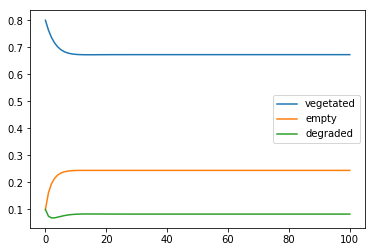

In [10]:
print(y.T[1])
plt.plot(y.T[0], label = "vegetated" )
plt.plot(y.T[1], label = "empty")
plt.plot(y.T[2], label = "degraded")
plt.legend()

plt.show()

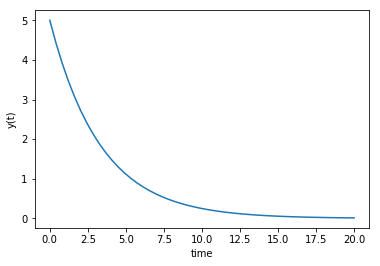

In [11]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dy/dt
def model(y,t):
    k = 0.3
    dydt = -k * y
    return dydt



# initial condition
y0 = 5

# time points
t = np.linspace(0,20)

# solve ODE
y = odeint(model,y0,t)

# plot results
plt.plot(t,y)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()